# Modelling and Evaluation

## Objectives

- Answer Business requirement 2:
    - The client is interested to tell whether a given image of a cherry leaf is healthy or has powdery mildew.

## Inputs

- inputs/cherry_leaves/cherry-leaves/train
- inputs/cherry_leaves/cherry-leaves/test
- inputs/cherry_leaves/cherry-leaves/validation

## Outputs

- [Images distribution](../outputs/v1/labels_distribution.png) plot in train, validation, and test set.
- Image augmentation.
- Class indices to change prediction inference in labels.
- Machine learning model creation and training.
- Save model as [mildew_detection_model.h5](../outputs/v1/mildew_detection_model.h5).
- Learning curve plot for model performance.
- Model evaluation pickle file.
- Prediction on the random image file.



---

# Change working directory

Change the working directory from its current folder to its parent folder
* Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection'

# Import packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

## Set input directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/cherry_leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

Create folders to store results

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set labels

In [7]:
labels = os.listdir(train_path)

print(
    f"Image Labels: {labels}"
)

Image Labels: ['healthy', 'powdery_mildew']


## Set image shape

In [8]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Number of images in train, test and validation data

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




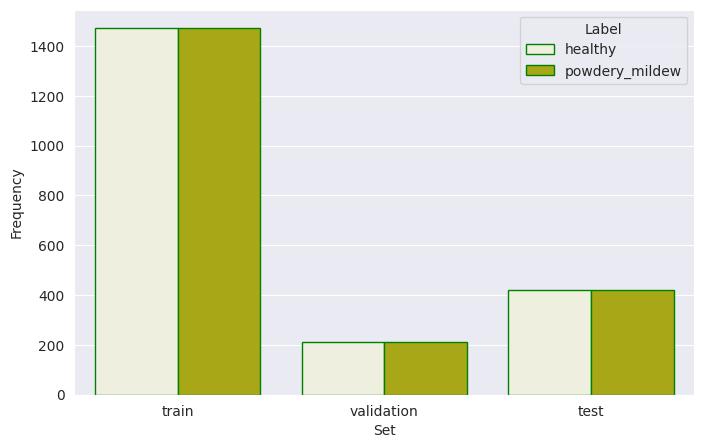

In [9]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
# create bar plot
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label', color='y', edgecolor='g')
# save figure to output directory
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

# Image data augmentation

### ImageDataGenerator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- Initialize ImageDataGenerator

In [11]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

#### Augment training image dataset

In [12]:
# Set batch size
batch_size = 20
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

#### Augment validation image dataset

In [13]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

#### Augment test image dataset

In [14]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(20, 256, 256, 3)


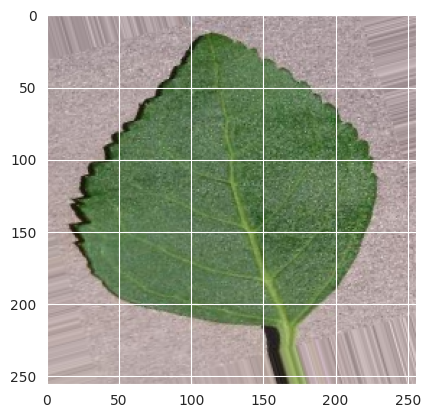

(20, 256, 256, 3)


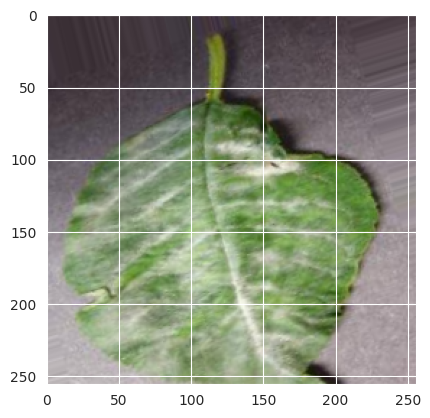

(20, 256, 256, 3)


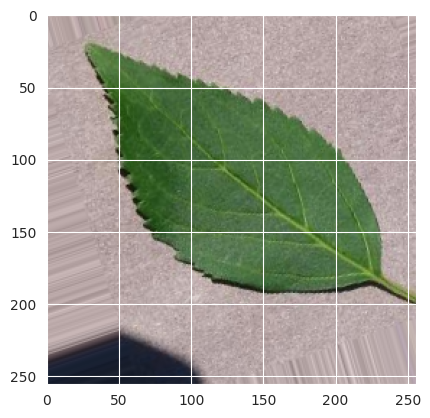

In [15]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation image

(20, 256, 256, 3)


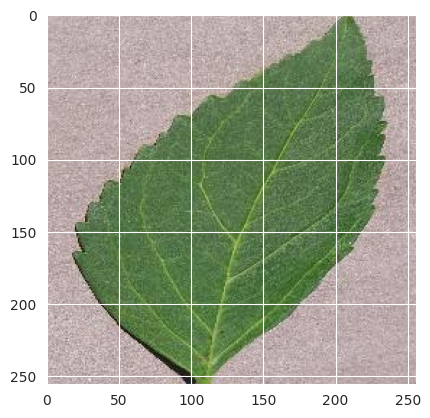

(20, 256, 256, 3)


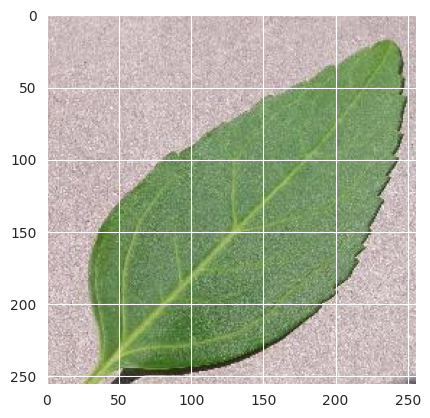

(20, 256, 256, 3)


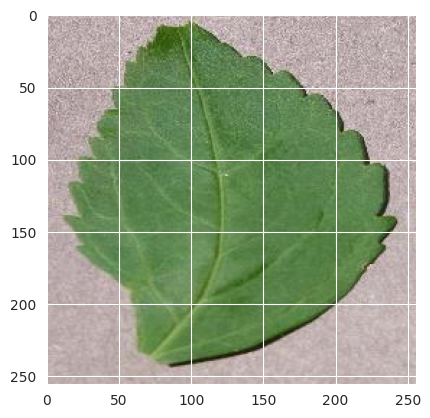

In [16]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

## Plot augmented test image

(20, 256, 256, 3)


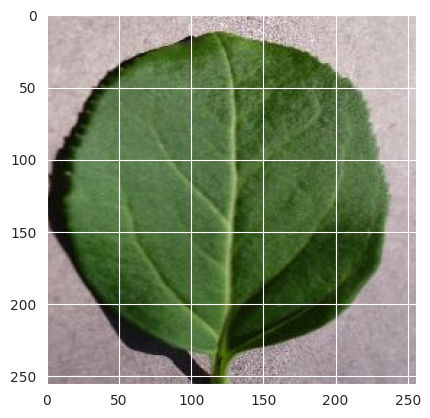

(20, 256, 256, 3)


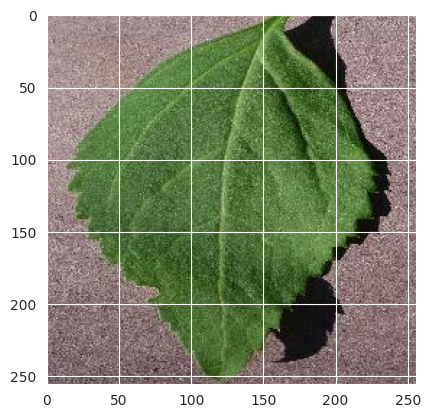

(20, 256, 256, 3)


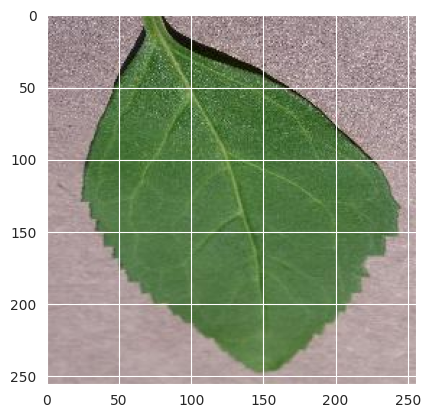

In [17]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [18]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Model creation

---

## ML model

- Import packages

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### **Model**

- CNN model is used for image processing and designed for binary image classification.
- Sequential model arranges a sequence of layers in  neural network.
- Model has 4 convolutional layers:
    - 1st convolutional layer has 32 filters, size 3x3, relu activation function and and max pooling layer.
    - 2nd convolutional layer has 8 filters, size 3x3, relu activation function and and max pooling layer.
    - 3rd convolutional layer has 8 filters, size 3x3, relu activation function and and max pooling layer.
    - 4th convolutional layer has 16 filters, size 3x3, relu activation function and and max pooling layer.
    > Model previously had 3 layers and filters were 16, 32 & 16. For a better fit to  size of dataset and get better performance filters were updated.
    
    > **Dense layer updated as 128 neurons** to get accurate predictions. Previously had 64 neurons.
    
    - When tested on streamlit dashboard, model predicted a random mildew infected leaf image as healthy. To prevent underfitting dense layer is increased.
- Dropout layer and earlystopping is used to reduce the chance of overfitting the neural network.
- The output layer has one neuron with a sigmoid as the activation function.
- The loss function used is binary_crossentropy because it is a binary classification.
- The optimizer used is adam.

In [45]:
def create_tf_model():
    """
    Create a sequential model for binary image classification.
    """
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape,
              activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=image_shape,
              activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=image_shape,
              activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=image_shape,
              activation='relu', ))

    model.add(Flatten())
    model.add(Dense(128, activation='relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

    return model

#### Model summary

In [46]:
create_tf_model().summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 125, 125, 8)       2312      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 60, 60, 8)         584       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 28, 28, 16)      

#### Early stopping

- Add early stopping to prevent model from overfitting 

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

### Fit model for model training

In [48]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/25
147/147 [==============================] - 204s 1s/step - loss: 0.3280 - accuracy: 0.8454 - val_loss: 0.1429 - val_accuracy: 0.9500
Epoch 2/25
147/147 [==============================] - 202s 1s/step - loss: 0.0761 - accuracy: 0.9772 - val_loss: 0.0345 - val_accuracy: 0.9929
Epoch 3/25
147/147 [==============================] - 200s 1s/step - loss: 0.0625 - accuracy: 0.9846 - val_loss: 0.0231 - val_accuracy: 0.9952
Epoch 4/25
147/147 [==============================] - 198s 1s/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0051 - val_accuracy: 0.9976
Epoch 5/25
147/147 [==============================] - 199s 1s/step - loss: 0.0280 - accuracy: 0.9901 - val_loss: 0.0494 - val_accuracy: 0.9929
Epoch 6/25
147/147 [==============================] - 199s 1s/step - loss: 0.0502 - accuracy: 0.9805 - val_loss: 0.0056 - val_accuracy: 0.9952
Epoch 7/25
147/147 [==============================] - 199s 1s/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0112 - val_accuracy: 0.9952

### Save Model

In [49]:
model.save('outputs/v1/mildew_detection_model.h5')

---

# Model Performace

---

## Model learning curve

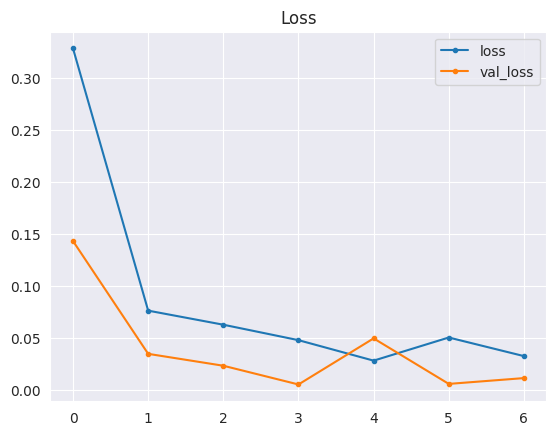

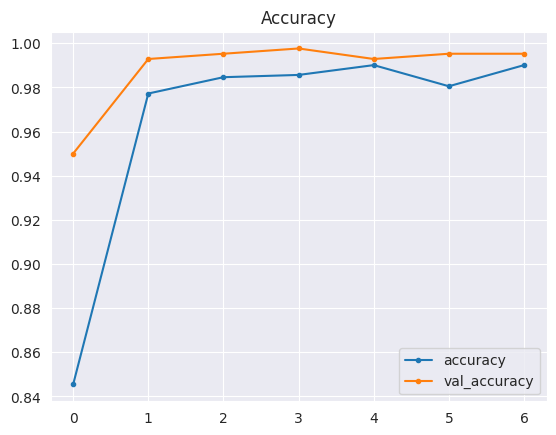

In [50]:
losses = pd.DataFrame(model.history.history)

sns.set_style("darkgrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()


print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

- Load saved model

In [51]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detection_model.h5')

- Evaluate model on test set

In [52]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 16s 348ms/step - loss: 0.0288 - accuracy: 0.9941


### Save evaluation pickle

In [53]:
joblib.dump(value=evaluation ,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

## Predict on new data

- Load a random image as PIL

Image shape: (256, 256), Image mode: RGB


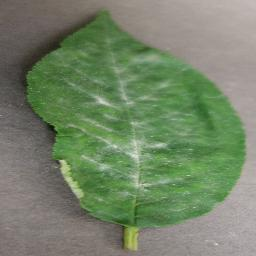

In [60]:
from tensorflow.keras.preprocessing import image

pointer = 66 
label = labels[1] # select healthy or Powdery Mildew

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

- Convert image to array and prepare for prediction

In [61]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


- Predict class probabilities

In [62]:
pred_proba = model.predict(my_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class =  target_map[pred_proba > 0.5]

if pred_class == target_map[0]: pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

0.9998915
powdery_mildew


---

# Conclusions

- The Image dataset was augmented to satisfy a CNN's demand for a large number of images.
- The model is trained and tuned using a deep-learning Convolutional Neural Network.
- The model's performace was evaluated on new data and it satisfied the clients demands for accuracy.
    - Client demand **(97%)**.
    - Model's actual performance **(99%)**.
- The model and the model evaluation is saved as a pickle file.
- The model predicted well on random cherry leaf samples.
- Business requirement 2 is met.

## Further steps

- Create a dashboard for the client.